# Depression Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('final_depression_dataset_1.csv')

data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


## Data Cleaning

In [29]:
# Example of handling missing values without inplace=True
data['Academic Pressure'].unique()

data['Academic Pressure'] = data['Academic Pressure'].fillna(data['Academic Pressure'].mean())
data['CGPA'] = data['CGPA'].fillna(data['CGPA'].mean())
data['Study Satisfaction'] = data['Study Satisfaction'].fillna(data['Study Satisfaction'].mean())

# convert dietary
# Example of converting categorical columns to numerical values
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Working Professional or Student'] = data['Working Professional or Student'].map({'Working Professional': 1, 'Student': 0})  
data['Profession'] = data['Profession'].map({'Teacher': 1, 'Engineer': 2, 'Student': 3, 'Doctor': 4})  
data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Suicidal Thoughts'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})


0


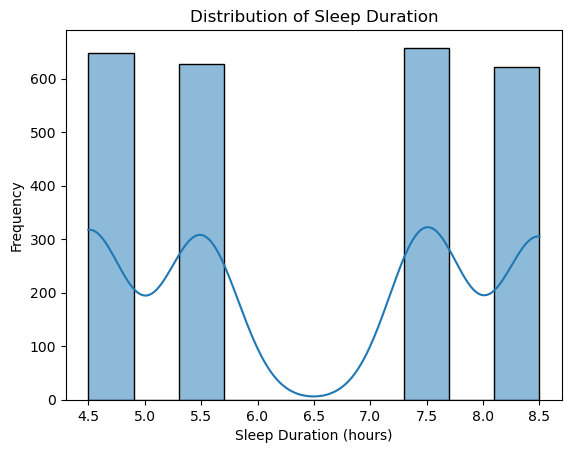

In [6]:
# Cleaning sleep_duration
sleep_duration_mapping = {
    "7-8 hours": 7.5,
    "5-6 hours": 5.5,
    "Less than 5 hours": 4.5,
    "More than 8 hours": 8.5
}

# Map text values to numerical values
data['Sleep Duration'] = data['Sleep Duration'].map(sleep_duration_mapping)

# Check for any remaining NaN values after mapping
print(data['Sleep Duration'].isnull().sum())

sns.histplot(data['Sleep Duration'], bins=10, kde=True)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Frequency")
plt.show()

## Exploratory Data Analysis (EDA)
* Descriptive statistics like mean, median, range, correlations* 
Data visualizations for univariate and multivariate exploratio
* n* 
Text explaining insights gained from exploration

In [8]:
# Create a summary DataFrame
summary = pd.DataFrame({
    "Column Name": data.columns,
    "Non-Null Count": data.notnull().sum(),
    "Data Type": data.dtypes,
    "Unique Values": data.nunique()
})

# Display the summary
summary

,Column Name,Non-Null Count,Data Type,Unique Values
Name,Name,2556,object,216
Gender,Gender,2556,int64,2
Age,Age,2556,int64,43
City,City,2556,object,30
Working Professional or Student,Working Professional or Student,2556,int64,2
Profession,Profession,388,float64,2
Academic Pressure,Academic Pressure,2556,float64,6
Work Pressure,Work Pressure,2054,float64,5
CGPA,CGPA,2556,float64,313
Study Satisfaction,Study Satisfaction,2556,float64,6


In [23]:
describe_data = data.describe().T
describe_data

,count,mean,std,min,25%,50%,75%,max
Gender,2556.0,0.521518,0.499635,0.00,0.000000,1.000000,1.000000,1.0
Age,2556.0,39.043036,12.260596,18.00,28.000000,39.000000,50.000000,60.0
Working Professional or Student,2556.0,0.803599,0.397353,0.00,1.000000,1.000000,1.000000,1.0
Profession,388.0,1.510309,1.128625,1.00,1.000000,1.000000,1.000000,4.0
Academic Pressure,2556.0,3.003984,0.615518,1.00,3.003984,3.003984,3.003984,5.0
Work Pressure,2054.0,3.021908,1.417312,1.00,2.000000,3.000000,4.000000,5.0
CGPA,2556.0,7.567809,0.648888,5.03,7.567809,7.567809,7.567809,10.0
Study Satisfaction,2556.0,3.075697,0.608203,1.00,3.075697,3.075697,3.075697,5.0
Job Satisfaction,2054.0,3.015093,1.418432,1.00,2.000000,3.000000,4.000000,5.0
Sleep Duration,2556.0,6.491393,1.578452,4.50,4.500000,7.500000,7.500000,8.5


In [25]:
# Check for missing values
null_data_count = data.isnull().sum()
null_data_count

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                               2168
Academic Pressure                           0
Work Pressure                             502
CGPA                                        0
Study Satisfaction                          0
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
Suicidal Thoughts                           0
dtype: int64

In [ ]:
# Range (max - min)
data_range = data.max(numeric_only=True) - data.min(numeric_only=True)
print("Range:\n", data_range)

# Variance
data_variance = data.var(numeric_only=True)
print("Variance:\n", data_variance)

# Skewness (asymmetry of data distribution)
data_skewness = data.skew(numeric_only=True)
print("Skewness:\n", data_skewness)

# Kurtosis (tail heaviness)
data_kurtosis = data.kurt(numeric_only=True)
print("Kurtosis:\n", data_kurtosis)


In [ ]:
# Plot histograms for numeric columns
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of All Numeric Features")
plt.show()

In [ ]:
# Correlation of features with Depression
target_corr = data.select_dtypes(include=[np.number]).corr()['Depression'].sort_values(ascending=False)
print("Correlation with Depression:\n", target_corr)


In [ ]:
# Frequency distribution for each categorical column
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    print(f"Value counts for {column}:\n", data[column].value_counts())
    print("\n")


In [ ]:
#sns.pairplot(data, hue='Depression')  # Use 'hue' to separate by Depression status
#plt.show()

In [ ]:
# Save descriptive statistics to a CSV file
descriptive_stats = data.describe().T
descriptive_stats['Range'] = data_range
descriptive_stats['Variance'] = data_variance
descriptive_stats['Skewness'] = data_skewness
descriptive_stats['Kurtosis'] = data_kurtosis

descriptive_stats.to_csv('descriptive_statistics.csv')

## Exploratory Data Analysis (EDA)
* Descriptive statistics like mean, median, range, correlations* Data visualizations for univariate and multivariate explorationn

In [ ]:
# Select numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Filter numerical columns that are not binary or constant
filtered_numeric_columns = [
    col for col in numeric_data.columns
    if data[col].nunique() > 2  # Exclude binary columns (columns with 2 unique values)
    and data[col].nunique() > 1  # Exclude constant columns (columns with 1 unique value)
]

# Define the number of rows and columns for the grid
n_cols = 4  # Number of columns
n_rows = int(np.ceil(len(filtered_numeric_columns) / n_cols))  # Calculate rows dynamically

# Create a figure and axes for the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten to iterate easily

# Plot a boxplot for each filtered numerical column
for i, column in enumerate(filtered_numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')
    
# Remove empty subplots
for j in range(len(filtered_numeric_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
def plot_depression_by_category(data, category_column, palette="viridis"):
    # Calculate depression percentage for each category in the specified column
    depression_percentage = data.groupby(category_column)['Depression'].mean().sort_values(ascending=False)
    
    # Get the ordered categories
    category_order = depression_percentage.index
    
    # Create the plot with the specified palette
    plt.figure(figsize=(12, 8))
    sns.countplot(y=category_column, hue='Depression', data=data, palette=palette, order=category_order)
    plt.legend(title="Depression", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Depression by {category_column} (Ordered by Depression Percentage)')
    plt.show()

In [ ]:
# List of categorical columns you want to analyze
categorical_columns = ['Degree', 'Profession','Dietary Habits','Have you ever had suicidal thoughts ?','City']  # Add more as needed

# Color palettes for each plot
palettes = ["viridis", "mako", "magma", "flare", "rocket_r"]

# Loop through each categorical column and generate the plot
for column, palette in zip(categorical_columns, palettes):
    plot_depression_by_category(data, column, palette=palette)


In [ ]:
# Distribution of depression by gender
sns.countplot(x='Depression', hue='Gender', palette='viridis', data=data)
plt.title('Depression by Gender')
plt.show()

# Distribution of depression by age groups
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
sns.countplot(x='Depression', hue='Age Group', palette='rocket_r', data=data)
plt.title('Depression by Age Group')
plt.show()


In [ ]:
# Crosstab heatmap
crosstab = pd.crosstab(data['Depression'], data['Gender'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Depression by Gender')
plt.show()


In [ ]:
# Histograms for all numerical features
data.hist(figsize=(12, 10), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')
plt.show()


In [ ]:
sns.violinplot(x='Depression', y='Job Satisfaction', data=data)
plt.title('Job Satisfaction by Depression Status')
plt.show()


## Feature Selection
### Identifying most relevant variables

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Impute remaining missing values
imputer = SimpleImputer(strategy='mean')
numeric_data = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Define features and target
X = numeric_data.drop(['Depression'], axis=1)
y = numeric_data['Depression']

# SelectKBest for top 10 features
best_features = SelectKBest(score_func=chi2, k=10).fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': best_features.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores)


## Detect Outliers and Anomalies Using Isolation Forest

### Final Insights and Optimization
##### After building the model and evaluating feature importance, analyze findings for the most influential factors contributing to depression and highlight any patterns or anomalies. This comprehensive approach maximizes insights into the dataset, extracts important features, and ensures a well-rounded understanding of the underlying structure, facilitating evidence-based decisions or further research.